In [18]:
print("The goal is to make a comparison when we train our data for student enrollment probability using a Perceptron vs Adaline with stochastic gradient descent.")

The goal is to make a comparison when we train our student enrollment probability using a Perceptron vs Adaline with stochastic gradient descent.


In [1]:
import numpy as np

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training examples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        #print(self.w_)
        #print("xi:", xi, "target:", target, "output:", output, "error:", error)
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [40]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        #self.w_ = np.zeros(1 + X.shape[1]) ###
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            #print(ppn.w_) ###
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [41]:
import pandas as pd

data = pd.read_csv('student-enrolled-1.csv').astype(float) ## note type cast
df = data.drop('Unnamed: 3', axis = 1)
df

,TUITION,DISTRICT-POPULATION(x10),ENROLLED
0,2000.0,600.0,1.0
1,4200.0,2000.0,1.0
2,1600.0,300.0,-1.0
3,3000.0,470.0,-1.0
4,950.0,1700.0,1.0
5,1000.0,2890.0,1.0


In [42]:
df2 = df.astype(int)
type(df2['TUITION'][0])

numpy.int64

In [43]:
a = df.to_numpy()
a

array([[ 2.00e+03,  6.00e+02,  1.00e+00],
       [ 4.20e+03,  2.00e+03,  1.00e+00],
       [ 1.60e+03,  3.00e+02, -1.00e+00],
       [ 3.00e+03,  4.70e+02, -1.00e+00],
       [ 9.50e+02,  1.70e+03,  1.00e+00],
       [ 1.00e+03,  2.89e+03,  1.00e+00]])

In [44]:
b = df2.to_numpy()
b

array([[2000,  600,    1],
       [4200, 2000,    1],
       [1600,  300,   -1],
       [3000,  470,   -1],
       [ 950, 1700,    1],
       [1000, 2890,    1]])

In [45]:
enrolled = b[b[:,2] == 1, :2]
enrolled

array([[2000,  600],
       [4200, 2000],
       [ 950, 1700],
       [1000, 2890]])

In [46]:
notEnrolled = b[b[:,2] == -1, :2]
notEnrolled

array([[1600,  300],
       [3000,  470]])

In [47]:
X = a[:, :2]
X

array([[2000.,  600.],
       [4200., 2000.],
       [1600.,  300.],
       [3000.,  470.],
       [ 950., 1700.],
       [1000., 2890.]])

In [48]:
y = a[:, 2]
y

array([ 1.,  1., -1., -1.,  1.,  1.])

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt 
from matplotlib.colors import ListedColormap
#plt.rcdefaults() 

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [50]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std

array([[-0.10819402, -0.76934841],
       [ 1.79602078,  0.71288247],
       [-0.4544149 , -1.08696931],
       [ 0.75735816, -0.90698413],
       [-1.01702382,  0.39526157],
       [-0.97374621,  1.65515782]])

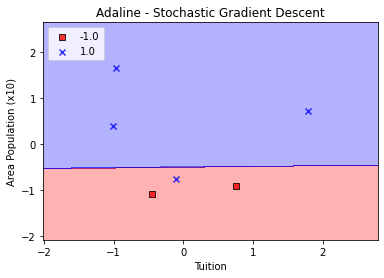

[0.49414706657925356, 0.31467805380769004, 0.2810143955083609, 0.2761496858566433, 0.27912182800024943, 0.2762911982199342, 0.272449071747872, 0.2750035241459961, 0.2784634845494885, 0.28268200797100534, 0.2720567067979216]


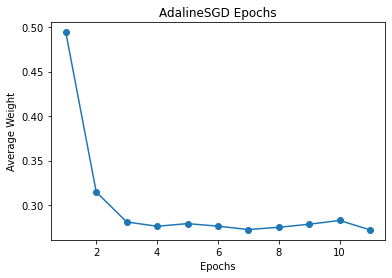

In [51]:
ada_sgd = AdalineSGD(n_iter=11, eta=0.1, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd, resolution=0.01)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Tuition')
plt.ylabel('Area Population (x10)')
plt.legend(loc='upper left')

plt.show()

print(ada_sgd.cost_)

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Weight')
plt.title("AdalineSGD Epochs")

plt.show()

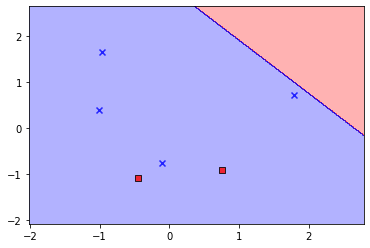

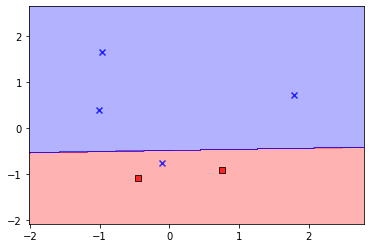

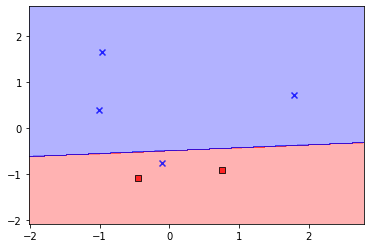

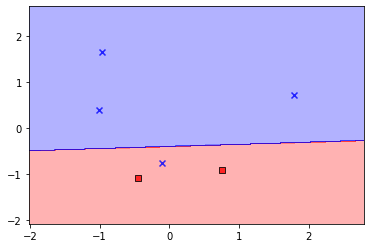

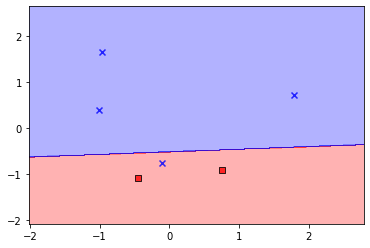

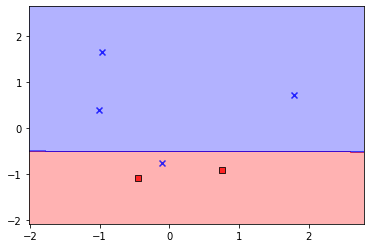

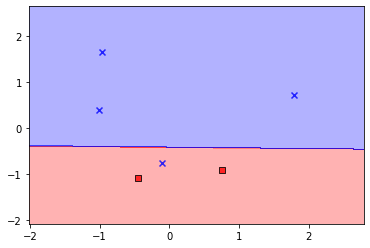

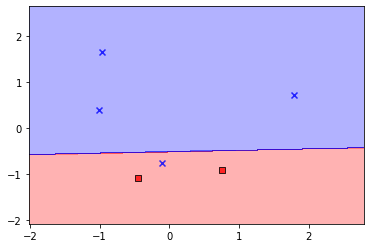

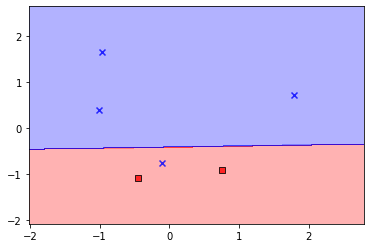

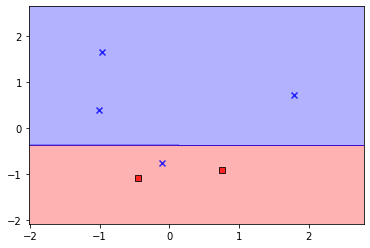

In [52]:
for limit in range(10):
    ada_sgd = AdalineSGD(n_iter=limit, eta=0.1, random_state=1)
    ada_sgd.fit(X_std, y)
    plot_decision_regions(X_std, y, classifier=ada_sgd, resolution=0.01)
    plt.show()

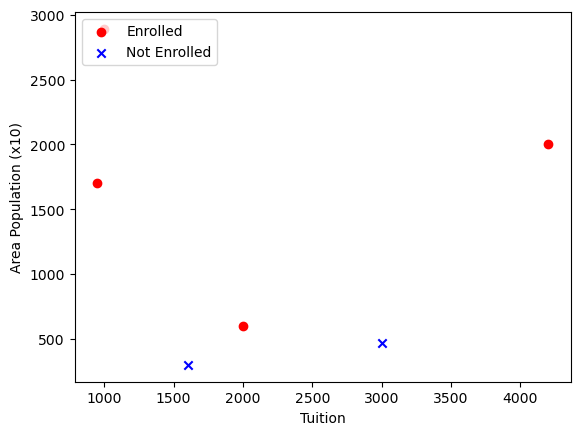

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np
plt.rcdefaults()

plt.scatter(enrolled[:, 0], enrolled[:, 1],
            color='red', marker='o', label='Enrolled')
plt.scatter(notEnrolled[:, 0], notEnrolled[:, 1],
            color='blue', marker='x', label='Not Enrolled')

plt.xlabel('Tuition')
plt.ylabel('Area Population (x10)')
plt.legend(loc='upper left')
plt.show()

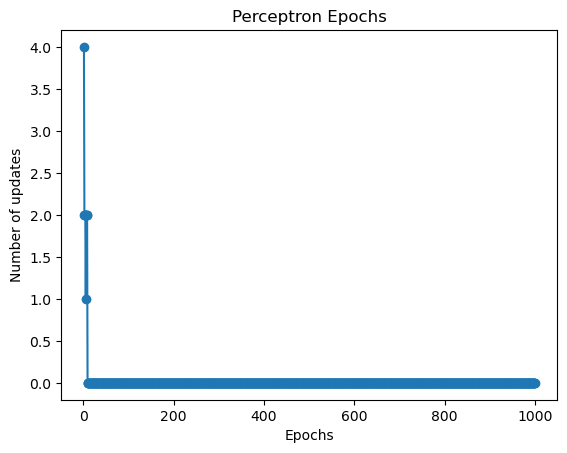

In [54]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.title("Perceptron Epochs")

plt.show()

#print(ppn.errors_)

AttributeError: 'Perceptron' object has no attribute 'w_'

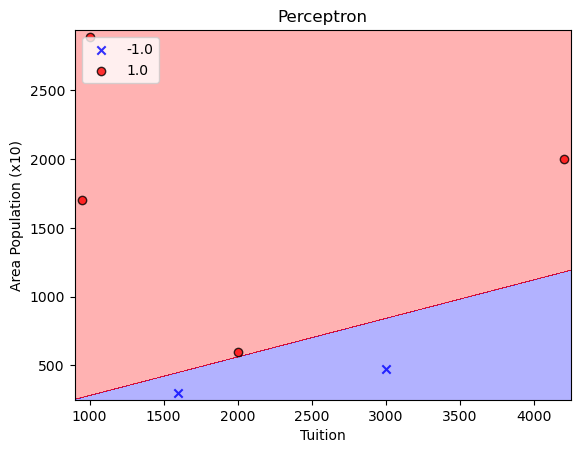

In [55]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=1): ### changed resolution

    # setup marker generator and color map
    markers = ('x', 'o', '^', 'v', 's') ### changed marker order
    colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan') ### changed color order
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 50, X[:, 0].max() + 50 ### changed margin from 1 to 50
    x2_min, x2_max = X[:, 1].min() - 50, X[:, 1].max() + 50 ### changed margin from 1 to 50
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Tuition') ### changed label
plt.ylabel('Area Population (x10)') ### changed label
plt.legend(loc='upper left')
plt.title("Perceptron")

plt.show()

In [59]:
print("The perceptron tends to separate the data better than AdalineSGD")

The perceptron tends to separate the data better than AdalineSGD
